<a href="https://colab.research.google.com/github/Yasminshaker/Data201/blob/main/Proj1_Mike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1
## By Mike


### In this project, we will examine different types of crime commited in Montgomery County. The source for this dataset can be found https://data.montgomerycountymd.gov/Public-Safety/Crime/icn6-v9z3


The data found in this dataset is provided by “EJustice”, a respected law enforcement records-management system used by the Montgomery County Police Department. It is important to mention that names and other private information is not included for safety and privacy reasons.


This dataset consists of 279k rows and 30 columns. Some columns included are Incident ID, Start_Date_Time, End_Date_Time, Victims, Location, and Police District to name a few. Another important column is the crime column which is broken down into 2 other columns that further explain the crime committed.


As Montgomery County Residents it is important to stay up to date with the level of crime committed across the county. Some questions of interest include which city in Montgomery County has the most reported crime? What is the most common type of crime committed? What time are crimes most likely to occur?
All this with the hopes of being more aware of the level of crime in the county and to develop solutions to lower crime rates.






### Loading data and EDA

In [ ]:
def recursive_function(count):
    # Base case: stop recursion when count is 0 or negative
    if count <= 0:
        return
    # Recursive call
    recursive_function(count - 1)



In [ ]:
from google.colab import files
uploaded = files.upload()

MessageError: ignored

In [ ]:
import pandas as pd
import io
montgomery_data= pd.read_csv(io.BytesIO(uploaded['Crime.csv']))
montgomery_data.head()

NameError: ignored

In [ ]:
print(montgomery_data.shape)
print(montgomery_data.columns)

(278811, 39)
Index(['Incident ID', 'Offence Code', 'CR Number', 'Dispatch Date / Time',
       'Start_Date_Time', 'End_Date_Time', 'NIBRS Code', 'Victims',
       'Crime Name1', 'Crime Name2', 'Crime Name3', 'Police District Name',
       'Block Address', 'City', 'State', 'Zip Code', 'Agency', 'Place',
       'Sector', 'Beat', 'PRA', 'Address Number', 'Street Prefix',
       'Street Name', 'Street Suffix', 'Street Type', 'Latitude', 'Longitude',
       'Police District Number', 'Location', 'Council Districts', 'Councils',
       'Communities', 'Zip Codes', 'Municipalities',
       'Council Districts_from_i23j_3mj8', 'Service Regions',
       'Montgomery County Boundary', 'Council Districts 7'],
      dtype='object')


In [ ]:
print(montgomery_data.isna().sum())
# shows how man NA are in each column

Incident ID                              0
Offence Code                             0
CR Number                                0
Dispatch Date / Time                 40454
Start_Date_Time                          0
End_Date_Time                       139359
NIBRS Code                               0
Victims                                  0
Crime Name1                              0
Crime Name2                              0
Crime Name3                              0
Police District Name                   473
Block Address                        26711
City                                    13
State                                 5140
Zip Code                              2394
Agency                                   0
Place                                    0
Sector                                   0
Beat                                     0
PRA                                      6
Address Number                       26613
Street Prefix                       266298
Street Name

In [ ]:
# List of columns to delete
delete = ['Offence Code', 'CR Number', 'End_Date_Time', 'NIBRS Code', 'Sector', 'Beat', 'PRA', 'Block Address', 'State', 'Zip Code', 'Address Number', 'Street Prefix', 'Street Name', 'Street Suffix', 'Street Type', 'Location']

# Filter and remove only the columns that exist in the DataFrame
existing_columns = [col for col in delete if col in montgomery_data.columns]
montgomery_data.drop(columns=existing_columns, inplace=True)

# Printing the DataFrame after removing columns
print(montgomery_data.head())
print(montgomery_data.shape)
print(montgomery_data.columns)



   Incident ID    Dispatch Date / Time         Start_Date_Time  Victims  \
0    201450690  10/29/2023 06:24:40 PM  10/29/2023 06:00:00 PM        1   
1    201450683  10/29/2023 05:49:31 PM  10/29/2023 05:49:00 PM        1   
2    201450682  10/29/2023 05:04:37 PM  10/29/2023 05:04:00 PM        1   
3    201450682  10/29/2023 05:04:37 PM  10/29/2023 05:04:00 PM        1   
4    201450686  10/29/2023 05:01:12 PM  10/29/2023 05:01:00 PM        1   

              Crime Name1          Crime Name2  \
0    Crime Against Person       Simple Assault   
1  Crime Against Property    All other Larceny   
2  Crime Against Property  Motor Vehicle Theft   
3    Crime Against Person   Aggravated Assault   
4  Crime Against Property    All other Larceny   

                         Crime Name3 Police District Name                City  \
0               ASSAULT - 2ND DEGREE            ROCKVILLE           ROCKVILLE   
1                   LARCENY - POSTAL            ROCKVILLE           ROCKVILLE   
2  ST

In [ ]:
montgomery_data['City'].value_counts()
print(montgomery_data['City'].unique)
# Shows which city has the most cases

<bound method Series.unique of 0                  ROCKVILLE
1                  ROCKVILLE
2         MONTGOMERY VILLAGE
3         MONTGOMERY VILLAGE
4                  ROCKVILLE
                 ...        
278806             ROCKVILLE
278807             ROCKVILLE
278808         SILVER SPRING
278809              DAMASCUS
278810          GAITHERSBURG
Name: City, Length: 278811, dtype: object>


In [ ]:
city_counts = montgomery_data['City'].value_counts()
city_table = pd.DataFrame(montgomery_data).reset_index()
city_table.columns = ['City', 'Count']


ValueError: ignored

In [ ]:
sns.barplot(x='City', y='Count', data=city_table)
plt.title('Crime Count by City')
plt.xticks(rotation=90)
plt.show()

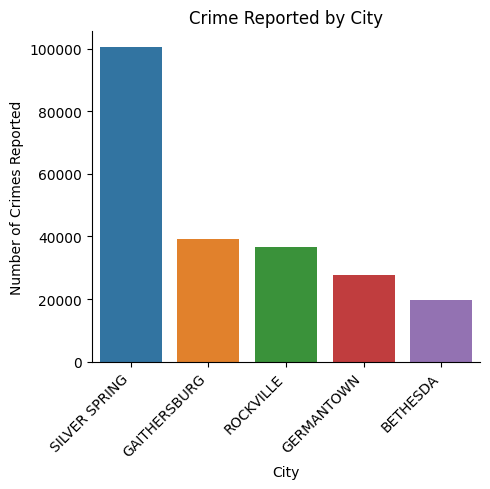

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

city_list = ["SILVER SPRING", "GAITHERSBURG", "ROCKVILLE", "GERMANTOWN", "BETHESDA"]
sns.catplot(data=montgomery_data, x='City', kind="count", order=city_list)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees
plt.xlabel('City')
plt.ylabel('Number of Crimes Reported')
plt.title('Crime Reported by City')
plt.tight_layout()
plt.show()

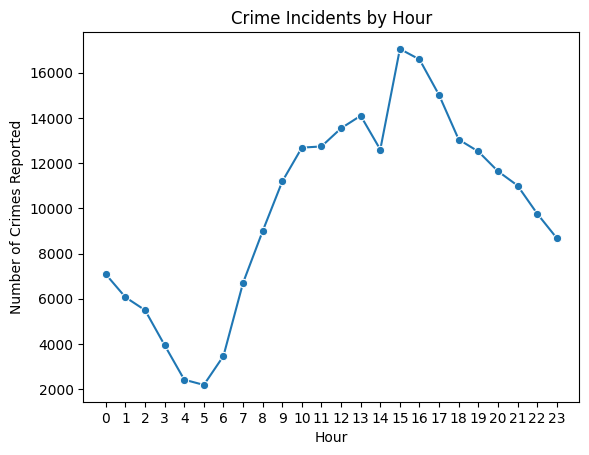

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame called 'montgomery_data'
# Replace 'montgomery_data' with the name of your actual DataFrame

# Extract the hour from the 'Dispatch Date / Time' column
montgomery_data['Hour'] = pd.to_datetime(montgomery_data['Dispatch Date / Time']).dt.hour

# Count the number of crimes for each hour
hourly_crime_counts = montgomery_data['Hour'].value_counts().sort_index()

# Plotting the data using seaborn
sns.lineplot(x=hourly_crime_counts.index, y=hourly_crime_counts.values, marker='o')
plt.xlabel('Hour')
plt.ylabel('Number of Crimes Reported')
plt.title('Crime Incidents by Hour')
plt.xticks(range(24))  # Show all hours on the x-axis

# Display the plot
plt.show()

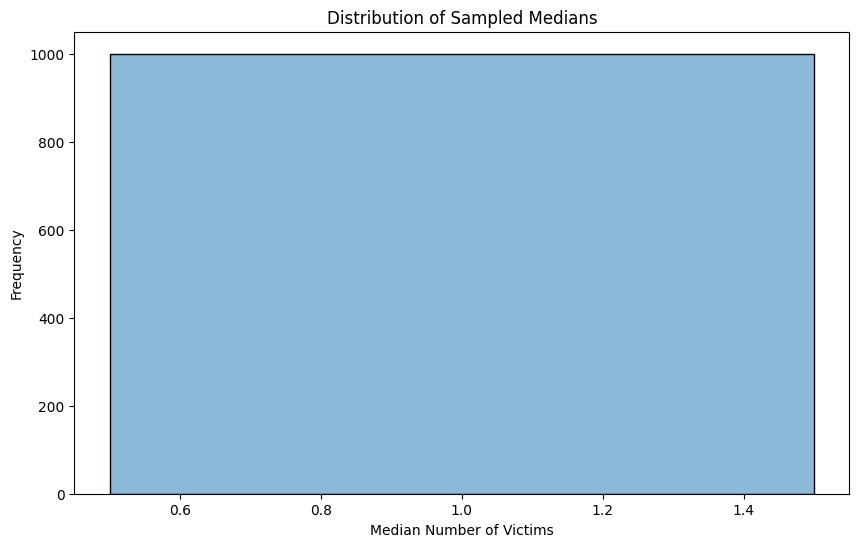

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(42)

# Define the quantitative variable of interest (e.g., 'Victims')
quantitative_variable = 'Victims'

# Number of simulations for median estimation
num_simulations = 1000

# Sample size for each simulation (10% of the data)
sample_size = int(0.10 * len(montgomery_data))

# Initialize a list to store the sampled medians
sampled_medians = []

# Perform simulations
for _ in range(num_simulations):
    # Randomly sample from the dataset
    sample = montgomery_data.sample(n=sample_size)
    # Calculate the median for the sampled data
    median = sample[quantitative_variable].median()
    sampled_medians.append(median)

# 1. Plot the distribution of sampled medians
plt.figure(figsize=(10, 6))
sns.histplot(sampled_medians, kde=True)
plt.title("Distribution of Sampled Medians")
plt.xlabel("Median Number of Victims")
plt.ylabel("Frequency")
plt.show()



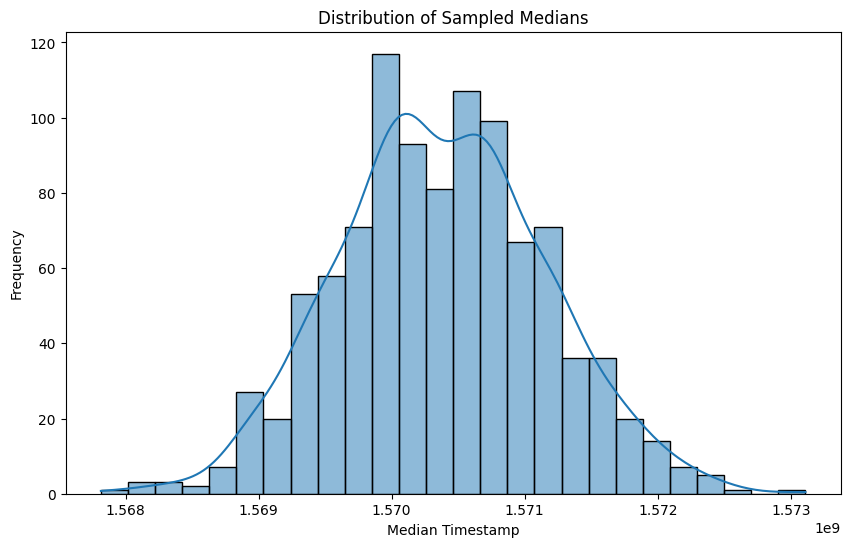

In [ ]:
import pandas as pd
import numpy as np



# Convert 'Dispatch Date / Time' to numeric format (e.g., seconds since a reference time)
# This example assumes you have a timestamp format; adjust as needed
montgomery_data['Timestamp'] = pd.to_datetime(montgomery_data['Dispatch Date / Time']).astype(int) / 10**9

# Number of simulations for median estimation
num_simulations = 1000

# Sample size for each simulation (10% of the data)
sample_size = int(0.10 * len(montgomery_data))

# Initialize a list to store the sampled medians
sampled_medians = []

# Set the random seed for reproducibility
np.random.seed(42)

# Perform simulations
for _ in range(num_simulations):
    # Randomly sample from the dataset
    sample = montgomery_data.sample(n=sample_size)
    # Calculate the median for the sampled data
    median = sample['Timestamp'].median()
    sampled_medians.append(median)

# Now, you can analyze the distribution of sampled medians, calculate confidence intervals, etc.
# Use similar code as provided in the previous response for analysis and visualization.

# Example: Plot the distribution of sampled medians
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(sampled_medians, kde=True)
plt.title("Distribution of Sampled Medians")
plt.xlabel("Median Timestamp")
plt.ylabel("Frequency")
plt.show()


In [ ]:
city_counts = montgomery_data['City'].value_counts()
city_table = pd.DataFrame(city_counts).reset_index()
city_table.columns = ['City', 'Count']

In [ ]:
sns.barplot(x='City', y='Count', data=montgomery_data)
plt.title('Crime Count by City')
plt.xticks(rotation=90)
plt.show()

ValueError: ignored

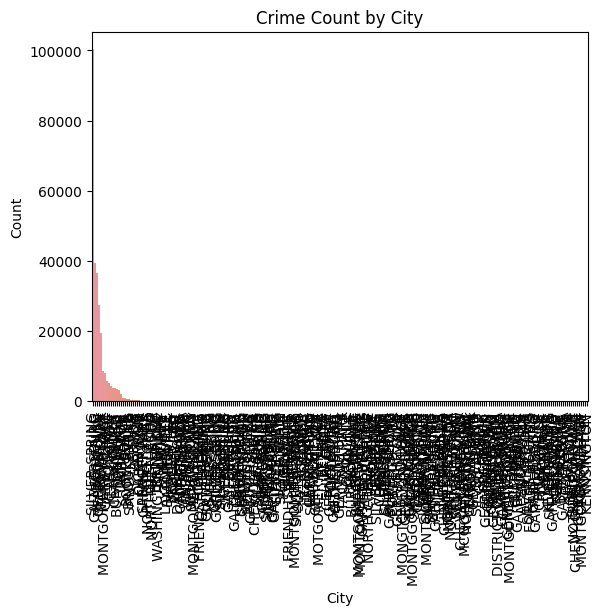